In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [49]:
heart = pd.read_csv('heart.csv')

In [50]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [51]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [52]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [53]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


<AxesSubplot:>

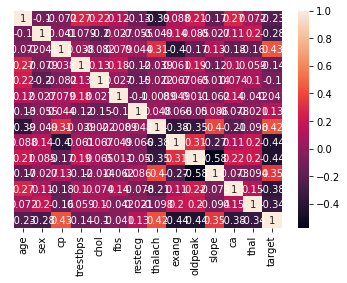

In [54]:
sns.heatmap(heart.corr(), annot=True, yticklabels=False)

<AxesSubplot:>

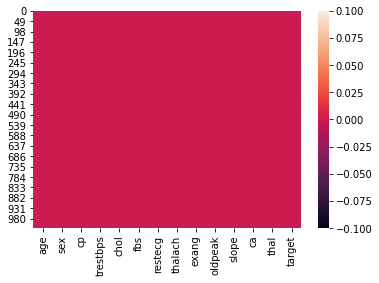

In [55]:
sns.heatmap(heart.isnull())

<AxesSubplot:xlabel='sex', ylabel='count'>

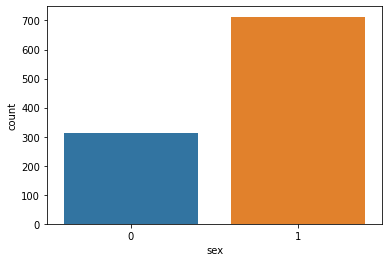

In [56]:
sns.countplot(heart['sex'])

<AxesSubplot:xlabel='age', ylabel='count'>

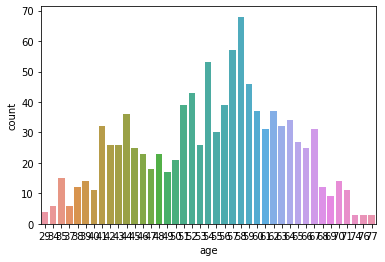

In [57]:
sns.countplot(heart['age'])

<AxesSubplot:xlabel='target', ylabel='count'>

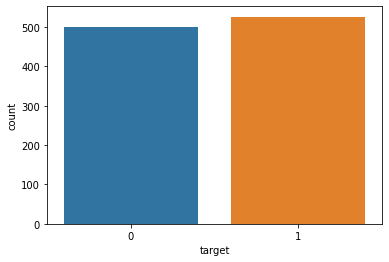

In [58]:
sns.countplot(heart['target'])

In [59]:
features = heart.drop(['target'], axis='columns')
target = heart['target']

In [60]:
features.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [61]:
target.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [62]:
from sklearn.model_selection import train_test_split

In [83]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=50, test_size=0.2)

In [84]:
from sklearn.svm import SVC

In [85]:
model = SVC()

In [86]:
model.fit(X_train, y_train)

SVC()

In [87]:
accuracy = 100 * (model.score(X_test, y_test))

accuracy

67.31707317073172

In [68]:
predictions = model.predict(X_test)

In [69]:
predictions

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1], dtype=int64)

In [70]:
from sklearn.metrics import classification_report, confusion_matrix

In [71]:
print(confusion_matrix(y_test, predictions))

[[62 44]
 [21 78]]


In [72]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.75      0.58      0.66       106
           1       0.64      0.79      0.71        99

    accuracy                           0.68       205
   macro avg       0.69      0.69      0.68       205
weighted avg       0.70      0.68      0.68       205



<AxesSubplot:>

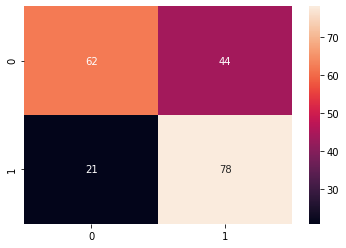

In [73]:
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

In [74]:
pred = model.predict(features)

In [75]:
results = pd.DataFrame({
    'Original' : heart['target'], 'Predicted': pred
})

In [76]:
results

,Original,Predicted
0,0,1
1,0,1
2,0,0
3,0,1
4,0,0
...,...,...
1020,1,1
1021,0,0
1022,0,0
1023,1,1


In [77]:
results.to_csv('heart_results.csv')